In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.modeling import models, fitting

from dust_extinction.averages import CT06_MWGC

from spectral_cube import SpectralCube

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
import smart_plotters.co_ice as co_map
from smart_plotters import cmd_plot

In [18]:
reg = regions.RectangleSkyRegion(SkyCoord(0.3781377378, 0.0410581341, unit='deg', frame='galactic'), 15*u.arcmin, 5*u.arcmin, angle=-25.90923*u.deg)


In [5]:
ls /orange/adamginsburg/cmz/nobeyama

12CO-2.BEARS.FITS   13CO-2.S115Q.FITS   CS21.OGEO.SP.NEW.FITS
12CO-2.S115Q.FITS   C18O-2.FOREST.FITS
13CO-2.FOREST.FITS  CO3-2.ASTE.FITS


In [20]:
cube_co_bears = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/12CO-2.BEARS.FITS', format='fits')
cube_co_s115q = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/12CO-2.S115Q.FITS', format='fits')
cube_13co_forest = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/13CO-2.FOREST.FITS', format='fits')
cube_13co_s115q = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/13CO-2.S115Q.FITS', format='fits')
cube_c18o_forest = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/C18O-2.FOREST.FITS', format='fits')
cube_co32_aste = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/CO3-2.ASTE.FITS', format='fits')

In [42]:
cube_c18o_forest.header['RESTFRQ']

119782182000.0

In [21]:
subcube_co_bears = cube_co_bears.subcube_from_regions([reg])
subcube_co_s115q = cube_co_s115q.subcube_from_regions([reg])
subcube_13co_forest = cube_13co_forest.subcube_from_regions([reg])
subcube_13co_s115q = cube_13co_s115q.subcube_from_regions([reg])
subcube_c18o_forest = cube_c18o_forest.subcube_from_regions([reg])
subcube_co32_aste = cube_co32_aste.subcube_from_regions([reg])

In [22]:
reg_left_cd = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/left_cloudd.region')

In [55]:
regcube_co_bears = cube_co_bears.subcube_from_regions(reg_left_cd)
regcube_co_s115q = cube_co_s115q.subcube_from_regions(reg_left_cd)
regcube_13co_forest = cube_13co_forest.subcube_from_regions(reg_left_cd)
regcube_13co_s115q = cube_13co_s115q.subcube_from_regions(reg_left_cd)
regcube_c18o_forest = cube_c18o_forest.subcube_from_regions(reg_left_cd)
regcube_co32_aste = cube_co32_aste.subcube_from_regions(reg_left_cd)

In [56]:
spec_co_bears = regcube_co_bears.mean(axis=(1,2))
spec_co_s115q = regcube_co_s115q.mean(axis=(1,2))
spec_13co_forest = regcube_13co_forest.mean(axis=(1,2))
spec_13co_s115q = regcube_13co_s115q.mean(axis=(1,2))
spec_c18o_forest = regcube_c18o_forest.mean(axis=(1,2))
spec_co32_aste = regcube_co32_aste.mean(axis=(1,2))

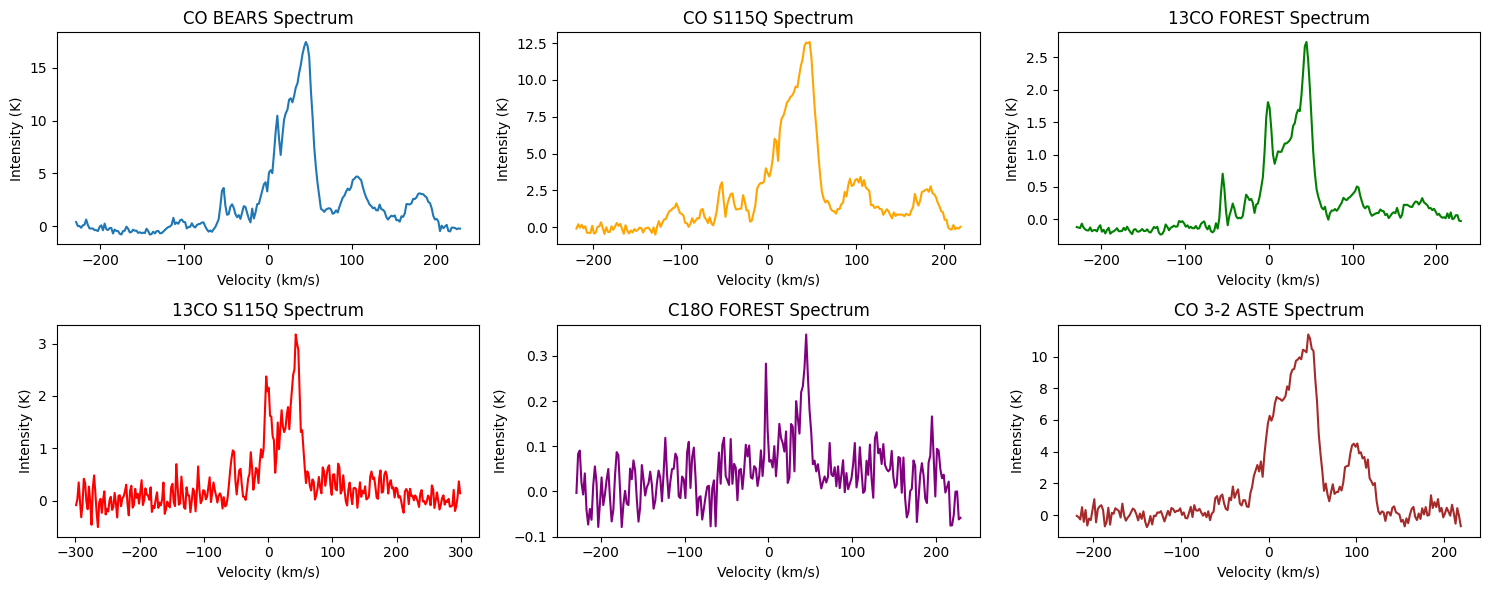

In [60]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231)
ax1.plot(spec_co_bears.spectral_axis.to(u.km/u.s), spec_co_bears.value, label='CO BEARS')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.set_title('CO BEARS Spectrum')

ax2 = plt.subplot(232)
ax2.plot(spec_co_s115q.spectral_axis.to(u.km/u.s), spec_co_s115q.value, label='CO S115Q', color='orange')
ax2.set_xlabel('Velocity (km/s)')
ax2.set_ylabel('Intensity (K)')
ax2.set_title('CO S115Q Spectrum')

ax3 = plt.subplot(233)
ax3.plot(spec_13co_forest.spectral_axis.to(u.km/u.s), spec_13co_forest.value, label='13CO FOREST', color='green')
ax3.set_xlabel('Velocity (km/s)')
ax3.set_ylabel('Intensity (K)')
ax3.set_title('13CO FOREST Spectrum')

ax4 = plt.subplot(234)
ax4.plot(spec_13co_s115q.spectral_axis.to(u.km/u.s), spec_13co_s115q.value, label='13CO S115Q', color='red')
ax4.set_xlabel('Velocity (km/s)')
ax4.set_ylabel('Intensity (K)')
ax4.set_title('13CO S115Q Spectrum')

ax5 = plt.subplot(235)
ax5.plot(spec_c18o_forest.spectral_axis.to(u.km/u.s), spec_c18o_forest.value, label='C18O FOREST', color='purple')
ax5.set_xlabel('Velocity (km/s)')
ax5.set_ylabel('Intensity (K)')
ax5.set_title('C18O FOREST Spectrum')

ax6 = plt.subplot(236)
ax6.plot(spec_co32_aste.spectral_axis.to(u.km/u.s), spec_co32_aste.value, label='CO 3-2 ASTE', color='brown')
ax6.set_xlabel('Velocity (km/s)')
ax6.set_ylabel('Intensity (K)')
ax6.set_title('CO 3-2 ASTE Spectrum')

plt.tight_layout()

In [45]:
mom0_co_bears = subcube_co_bears.moment0()
mom0_co_s115q = subcube_co_s115q.moment0()
mom0_13co_forest = subcube_13co_forest.moment0()
mom0_13co_s115q = subcube_13co_s115q.moment0()
mom0_c18o_forest = subcube_c18o_forest.moment0()
mom0_co32_aste = subcube_co32_aste.moment0()

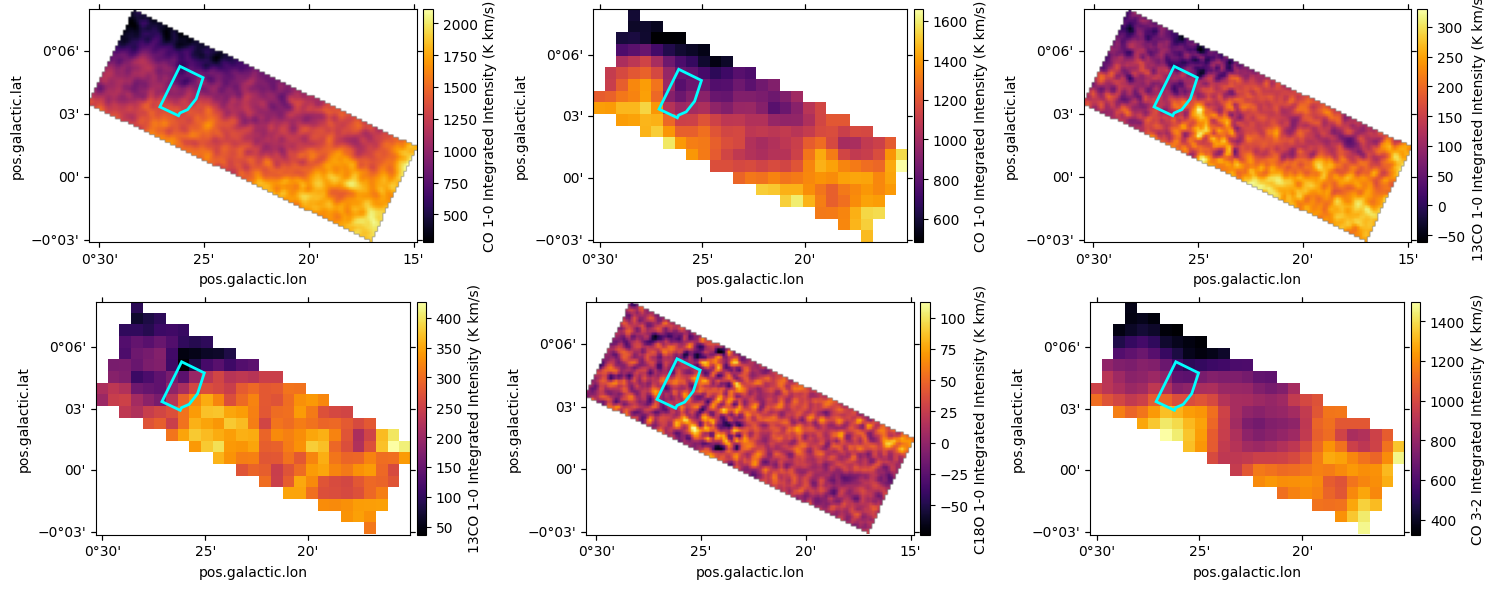

In [46]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231, projection=mom0_co_bears.wcs.celestial)
im = ax1.imshow(mom0_co_bears.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_bears.wcs.celestial).plot(ax=ax1, edgecolor='cyan', facecolor='none', lw=2)

ax2 = plt.subplot(232, projection=mom0_co_s115q.wcs.celestial)
im = ax2.imshow(mom0_co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_s115q.wcs.celestial).plot(ax=ax2, edgecolor='cyan', facecolor='none', lw=2)

ax3 = plt.subplot(233, projection=mom0_13co_forest.wcs.celestial)
im = ax3.imshow(mom0_13co_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_forest.wcs.celestial).plot(ax=ax3, edgecolor='cyan', facecolor='none', lw=2)

ax4 = plt.subplot(234, projection=mom0_13co_s115q.wcs.celestial)
im = ax4.imshow(mom0_13co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_s115q.wcs.celestial).plot(ax=ax4, edgecolor='cyan', facecolor='none', lw=2)

ax5 = plt.subplot(235, projection=mom0_c18o_forest.wcs.celestial)
im = ax5.imshow(mom0_c18o_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='C18O 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_c18o_forest.wcs.celestial).plot(ax=ax5, edgecolor='cyan', facecolor='none', lw=2)

ax6 = plt.subplot(236, projection=mom0_co32_aste.wcs.celestial)
im = ax6.imshow(mom0_co32_aste.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 3-2 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co32_aste.wcs.celestial).plot(ax=ax6, edgecolor='cyan', facecolor='none', lw=2)

plt.tight_layout()

In [49]:
mom0_co_bears = subcube_co_bears.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()
mom0_co_s115q = subcube_co_s115q.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()
mom0_13co_forest = subcube_13co_forest.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()
mom0_13co_s115q = subcube_13co_s115q.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()
mom0_c18o_forest = subcube_c18o_forest.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()
mom0_co32_aste = subcube_co32_aste.spectral_slab(20*u.km/u.s, 60*u.km/u.s).moment0()

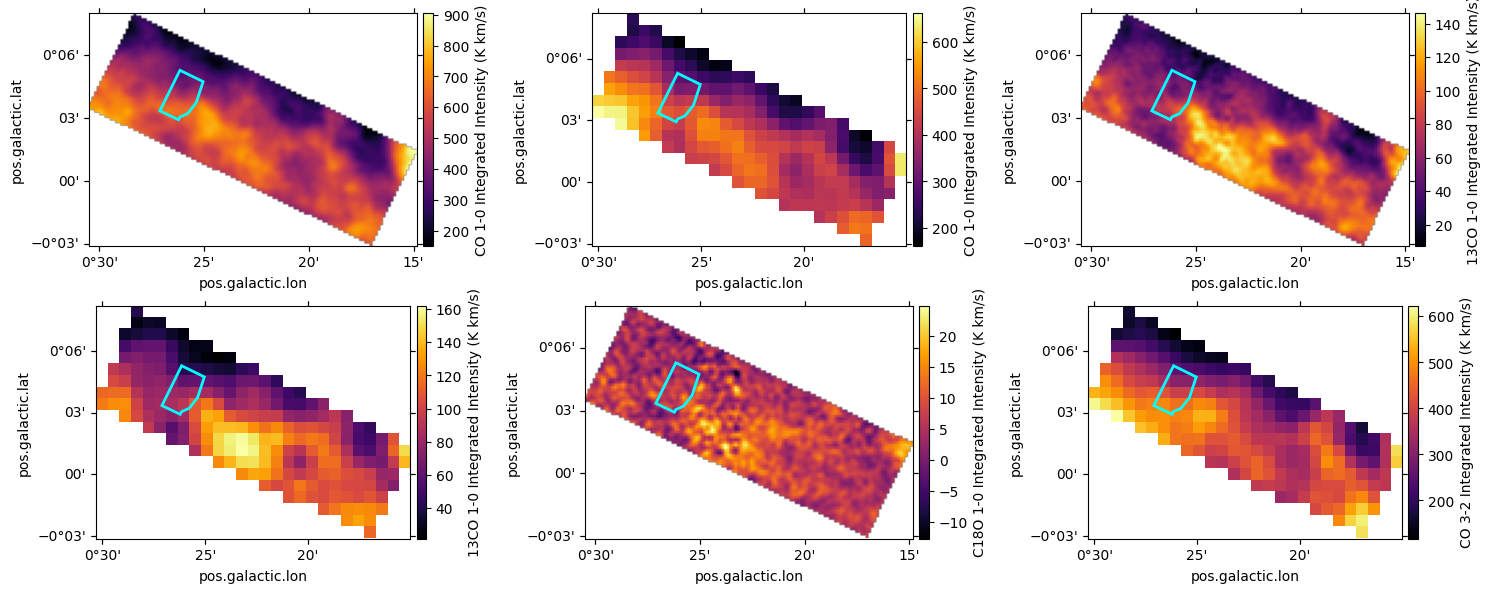

In [50]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231, projection=mom0_co_bears.wcs.celestial)
im = ax1.imshow(mom0_co_bears.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_bears.wcs.celestial).plot(ax=ax1, edgecolor='cyan', facecolor='none', lw=2)

ax2 = plt.subplot(232, projection=mom0_co_s115q.wcs.celestial)
im = ax2.imshow(mom0_co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_s115q.wcs.celestial).plot(ax=ax2, edgecolor='cyan', facecolor='none', lw=2)

ax3 = plt.subplot(233, projection=mom0_13co_forest.wcs.celestial)
im = ax3.imshow(mom0_13co_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_forest.wcs.celestial).plot(ax=ax3, edgecolor='cyan', facecolor='none', lw=2)

ax4 = plt.subplot(234, projection=mom0_13co_s115q.wcs.celestial)
im = ax4.imshow(mom0_13co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_s115q.wcs.celestial).plot(ax=ax4, edgecolor='cyan', facecolor='none', lw=2)

ax5 = plt.subplot(235, projection=mom0_c18o_forest.wcs.celestial)
im = ax5.imshow(mom0_c18o_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='C18O 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_c18o_forest.wcs.celestial).plot(ax=ax5, edgecolor='cyan', facecolor='none', lw=2)

ax6 = plt.subplot(236, projection=mom0_co32_aste.wcs.celestial)
im = ax6.imshow(mom0_co32_aste.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 3-2 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co32_aste.wcs.celestial).plot(ax=ax6, edgecolor='cyan', facecolor='none', lw=2)

plt.tight_layout()

In [51]:
mom0_co_bears = subcube_co_bears.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()
mom0_co_s115q = subcube_co_s115q.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()
mom0_13co_forest = subcube_13co_forest.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()
mom0_13co_s115q = subcube_13co_s115q.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()
mom0_c18o_forest = subcube_c18o_forest.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()
mom0_co32_aste = subcube_co32_aste.spectral_slab(-15*u.km/u.s, 10*u.km/u.s).moment0()

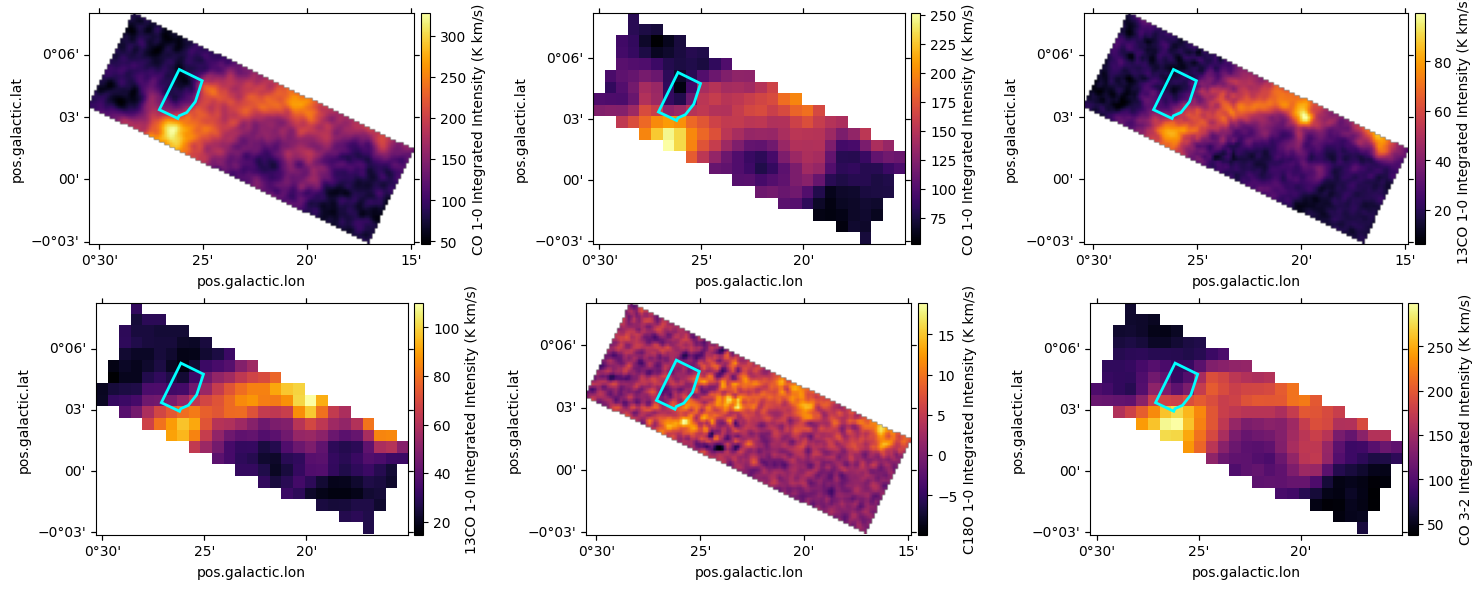

In [52]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231, projection=mom0_co_bears.wcs.celestial)
im = ax1.imshow(mom0_co_bears.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_bears.wcs.celestial).plot(ax=ax1, edgecolor='cyan', facecolor='none', lw=2)

ax2 = plt.subplot(232, projection=mom0_co_s115q.wcs.celestial)
im = ax2.imshow(mom0_co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_s115q.wcs.celestial).plot(ax=ax2, edgecolor='cyan', facecolor='none', lw=2)

ax3 = plt.subplot(233, projection=mom0_13co_forest.wcs.celestial)
im = ax3.imshow(mom0_13co_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_forest.wcs.celestial).plot(ax=ax3, edgecolor='cyan', facecolor='none', lw=2)

ax4 = plt.subplot(234, projection=mom0_13co_s115q.wcs.celestial)
im = ax4.imshow(mom0_13co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_s115q.wcs.celestial).plot(ax=ax4, edgecolor='cyan', facecolor='none', lw=2)

ax5 = plt.subplot(235, projection=mom0_c18o_forest.wcs.celestial)
im = ax5.imshow(mom0_c18o_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='C18O 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_c18o_forest.wcs.celestial).plot(ax=ax5, edgecolor='cyan', facecolor='none', lw=2)

ax6 = plt.subplot(236, projection=mom0_co32_aste.wcs.celestial)
im = ax6.imshow(mom0_co32_aste.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 3-2 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co32_aste.wcs.celestial).plot(ax=ax6, edgecolor='cyan', facecolor='none', lw=2)

plt.tight_layout()

In [61]:
mom0_co_bears = subcube_co_bears.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()
mom0_co_s115q = subcube_co_s115q.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()
mom0_13co_forest = subcube_13co_forest.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()
mom0_13co_s115q = subcube_13co_s115q.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()
mom0_c18o_forest = subcube_c18o_forest.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()
mom0_co32_aste = subcube_co32_aste.spectral_slab(75*u.km/u.s, 130*u.km/u.s).moment0()

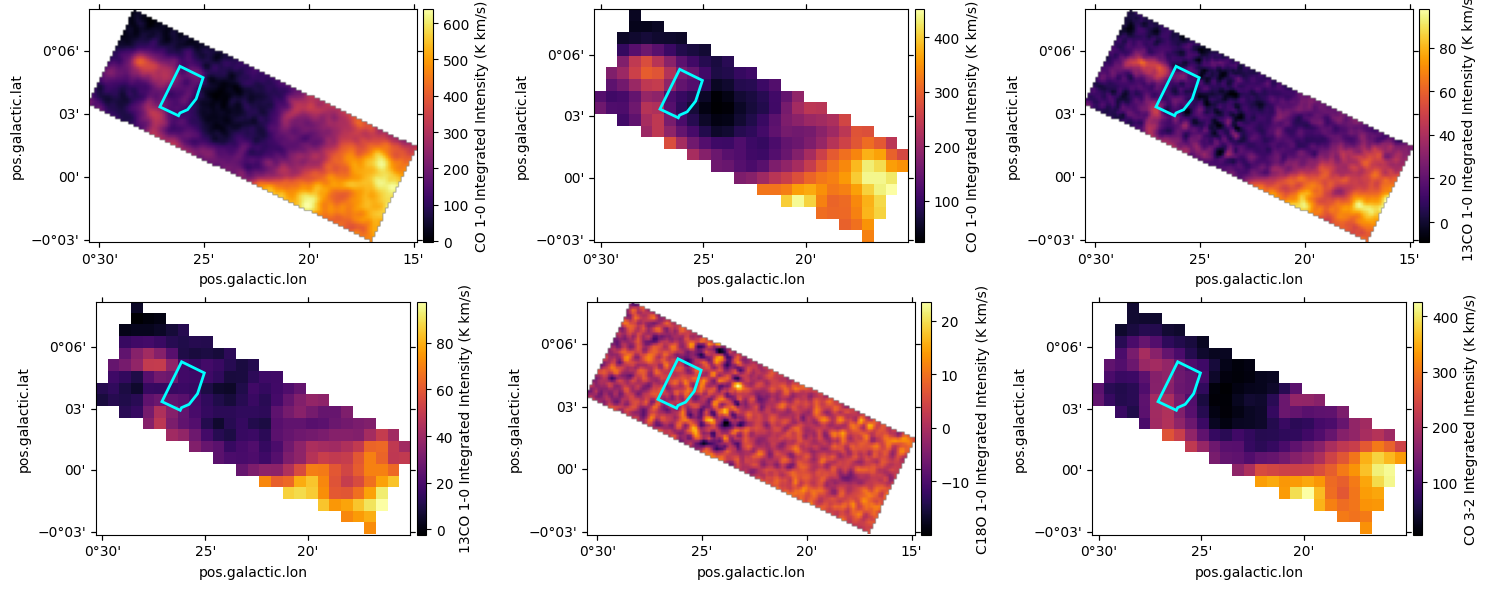

In [62]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231, projection=mom0_co_bears.wcs.celestial)
im = ax1.imshow(mom0_co_bears.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_bears.wcs.celestial).plot(ax=ax1, edgecolor='cyan', facecolor='none', lw=2)

ax2 = plt.subplot(232, projection=mom0_co_s115q.wcs.celestial)
im = ax2.imshow(mom0_co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_s115q.wcs.celestial).plot(ax=ax2, edgecolor='cyan', facecolor='none', lw=2)

ax3 = plt.subplot(233, projection=mom0_13co_forest.wcs.celestial)
im = ax3.imshow(mom0_13co_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_forest.wcs.celestial).plot(ax=ax3, edgecolor='cyan', facecolor='none', lw=2)

ax4 = plt.subplot(234, projection=mom0_13co_s115q.wcs.celestial)
im = ax4.imshow(mom0_13co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_s115q.wcs.celestial).plot(ax=ax4, edgecolor='cyan', facecolor='none', lw=2)

ax5 = plt.subplot(235, projection=mom0_c18o_forest.wcs.celestial)
im = ax5.imshow(mom0_c18o_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='C18O 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_c18o_forest.wcs.celestial).plot(ax=ax5, edgecolor='cyan', facecolor='none', lw=2)

ax6 = plt.subplot(236, projection=mom0_co32_aste.wcs.celestial)
im = ax6.imshow(mom0_co32_aste.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 3-2 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co32_aste.wcs.celestial).plot(ax=ax6, edgecolor='cyan', facecolor='none', lw=2)

plt.tight_layout()

In [63]:
mom0_co_bears = subcube_co_bears.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()
mom0_co_s115q = subcube_co_s115q.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()
mom0_13co_forest = subcube_13co_forest.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()
mom0_13co_s115q = subcube_13co_s115q.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()
mom0_c18o_forest = subcube_c18o_forest.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()
mom0_co32_aste = subcube_co32_aste.spectral_slab(160*u.km/u.s, 200*u.km/u.s).moment0()

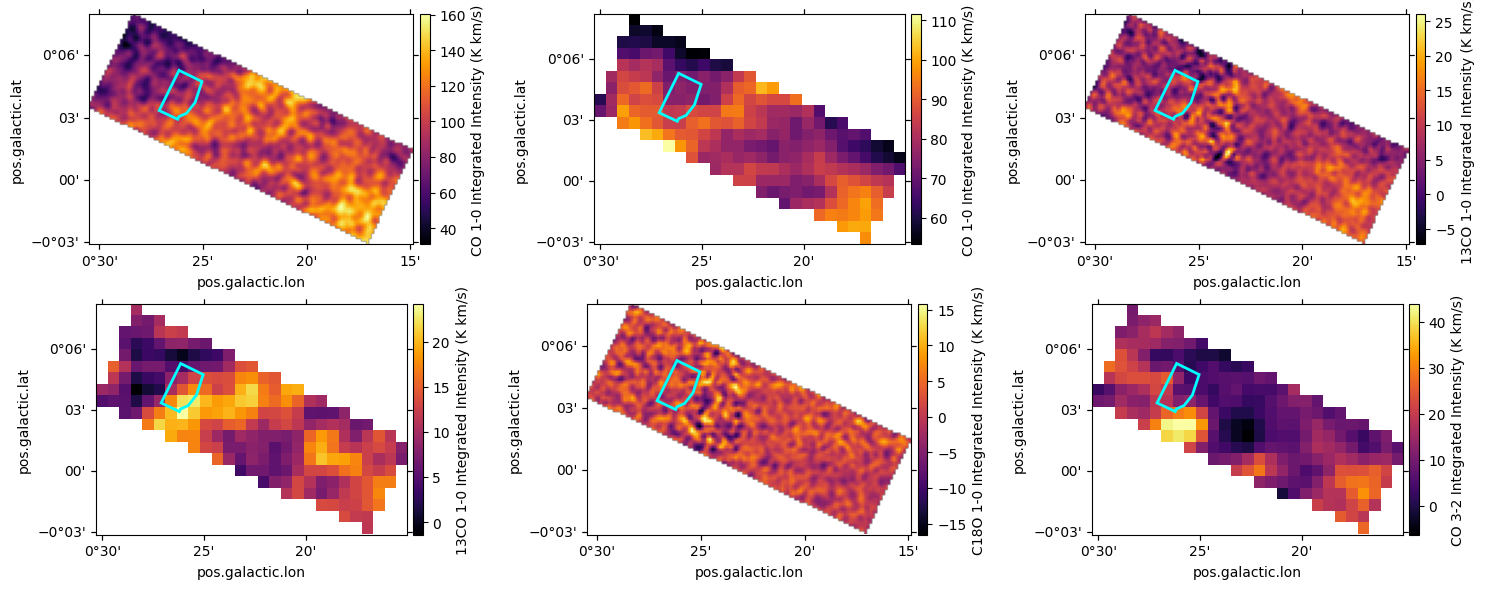

In [64]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(231, projection=mom0_co_bears.wcs.celestial)
im = ax1.imshow(mom0_co_bears.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_bears.wcs.celestial).plot(ax=ax1, edgecolor='cyan', facecolor='none', lw=2)

ax2 = plt.subplot(232, projection=mom0_co_s115q.wcs.celestial)
im = ax2.imshow(mom0_co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co_s115q.wcs.celestial).plot(ax=ax2, edgecolor='cyan', facecolor='none', lw=2)

ax3 = plt.subplot(233, projection=mom0_13co_forest.wcs.celestial)
im = ax3.imshow(mom0_13co_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_forest.wcs.celestial).plot(ax=ax3, edgecolor='cyan', facecolor='none', lw=2)

ax4 = plt.subplot(234, projection=mom0_13co_s115q.wcs.celestial)
im = ax4.imshow(mom0_13co_s115q.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='13CO 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_13co_s115q.wcs.celestial).plot(ax=ax4, edgecolor='cyan', facecolor='none', lw=2)

ax5 = plt.subplot(235, projection=mom0_c18o_forest.wcs.celestial)
im = ax5.imshow(mom0_c18o_forest.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='C18O 1-0 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_c18o_forest.wcs.celestial).plot(ax=ax5, edgecolor='cyan', facecolor='none', lw=2)

ax6 = plt.subplot(236, projection=mom0_co32_aste.wcs.celestial)
im = ax6.imshow(mom0_co32_aste.hdu.data, origin='lower', cmap='inferno')
cax = plt.gca().inset_axes([1.02, 0., 0.03, 1])
plt.colorbar(im, label='CO 3-2 Integrated Intensity (K km/s)', cax=cax)
reg_left_cd[0].to_pixel(mom0_co32_aste.wcs.celestial).plot(ax=ax6, edgecolor='cyan', facecolor='none', lw=2)

plt.tight_layout()